# Run 1: ToxicChat + Heuristic Refusal Detection

**DeepConf Safety Evaluation - Viewer Notebook**

---

## Executive Summary

**Dataset:** ToxicChat (5,083 test instances)
**Model:** Qwen3-0.6B
**Refusal Detection:** Pattern-based heuristics
**Traces per instance:** 10 (max)

### Critical Findings 🚨

1. **Confidence Paradox**
   - ❌ Incorrect predictions have **HIGHER** confidence (0.640 vs 0.510)
   - ⚠️ High confidence ≠ Correct prediction

2. **Toxicity Bias**
   - ❌ Toxic prompts get **33% HIGHER** confidence (0.679 vs 0.512)
   - ⚠️ Model is more confident when answering toxic content

3. **Safety Performance**
   - ✅ High sensitivity: 91-94% toxic catch rate
   - ❌ Low accuracy: 9-10% overall
   - ⚠️ Low specificity: Only 2-4% of safe content correctly allowed

4. **Optimal Strategy**
   - **Best safety:** 90th percentile (93.6% sensitivity, 23 missed toxic)
   - **Best efficiency:** 20th percentile (64.6% token savings)
   - **Trade-off:** Lower percentiles save more tokens with similar safety

---


## Key Metrics

| Metric | Value |
|--------|-------|
| Total instances | 5,083 |
| Toxic prompts | 362 (7.1%) |
| Safe prompts | 4,721 (92.9%) |
| Total traces analyzed | 48,145 |
| Avg traces per instance | 9.5 |

### Confidence Statistics

| Category | Mean | Std Dev |
|----------|------|--------|
| Correct predictions | 0.510 | 0.215 |
| Incorrect predictions | 0.640 | 0.223 |
| Safe prompts | 0.512 | 0.213 |
| Toxic prompts | 0.679 | 0.240 |

⚠️ **Incorrect and toxic have HIGHER confidence\!**

---


## 1. Safety Confusion Matrix

**Ground Truth × Model Prediction**



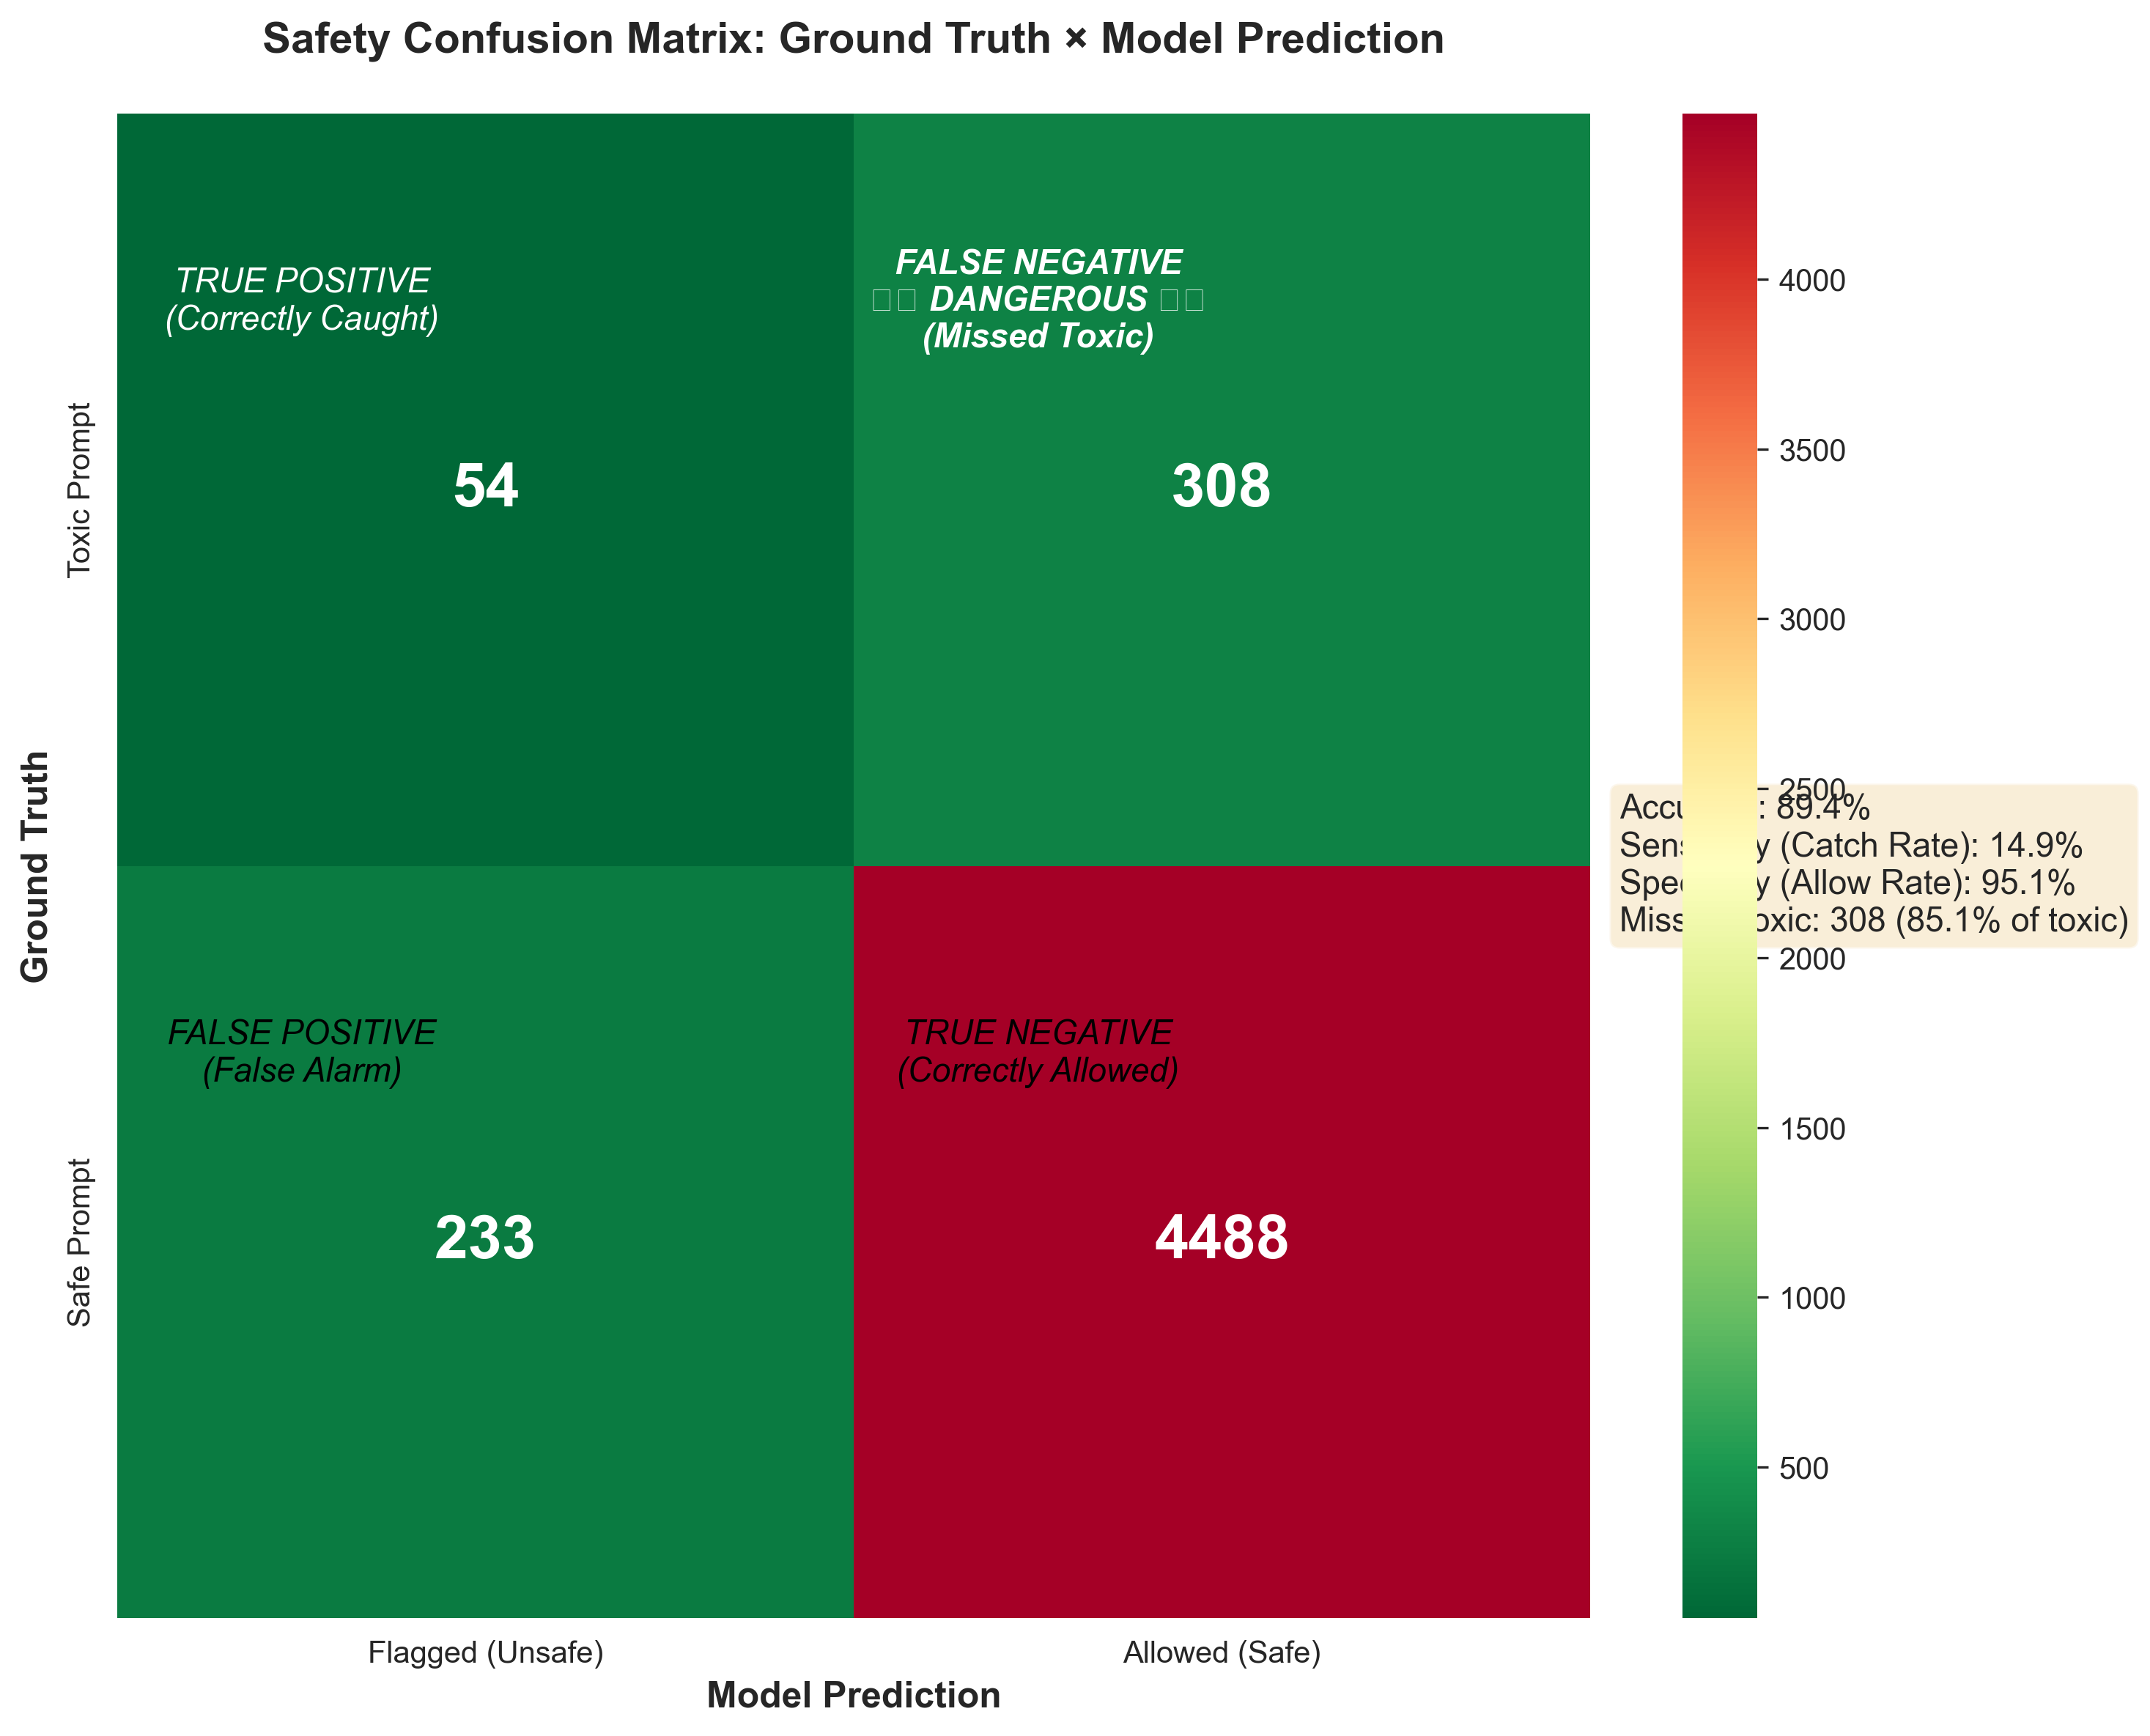

In [1]:
from IPython.display import Image, display
display(Image("plots/run1/confusion_matrix_2x2.png"))

## 2. Percentile Safety Curves

**Trade-offs: Accuracy, Sensitivity, Specificity, Token Savings**



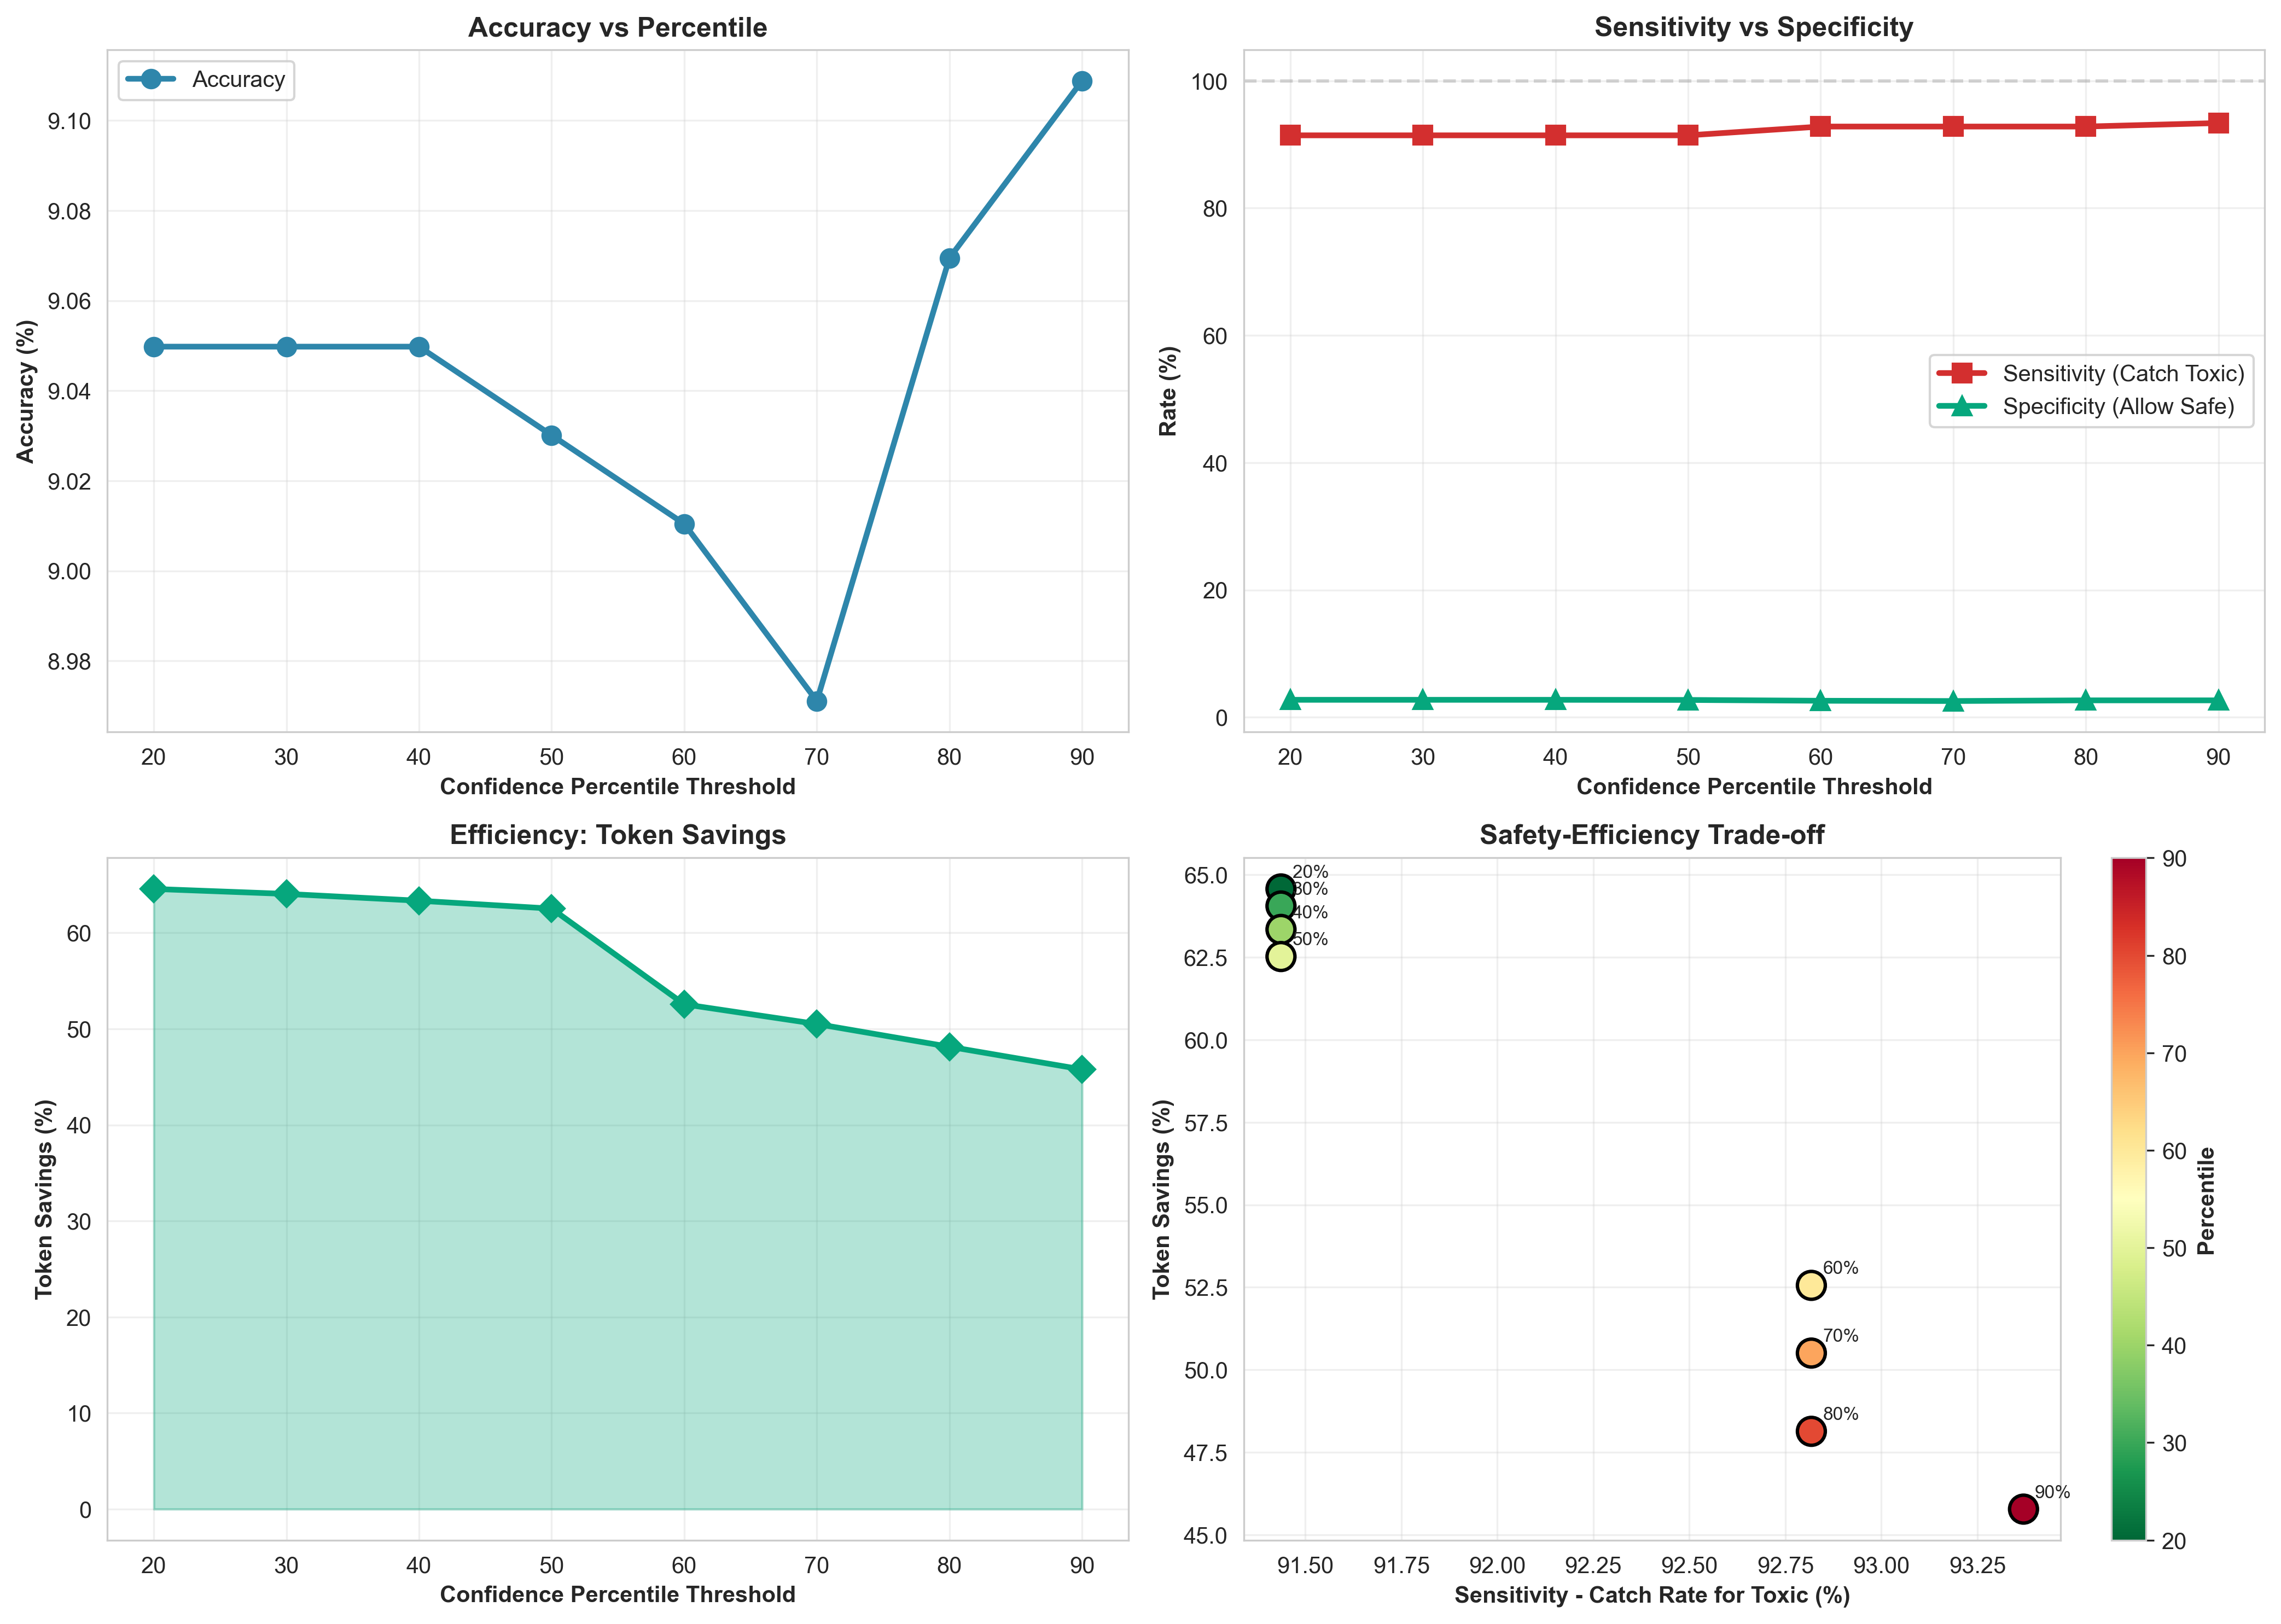

In [2]:
display(Image("plots/run1/percentile_safety_curves.png"))

## 3. Confidence by Correctness

⚠️ **Critical Finding:** Incorrect predictions have HIGHER confidence\!



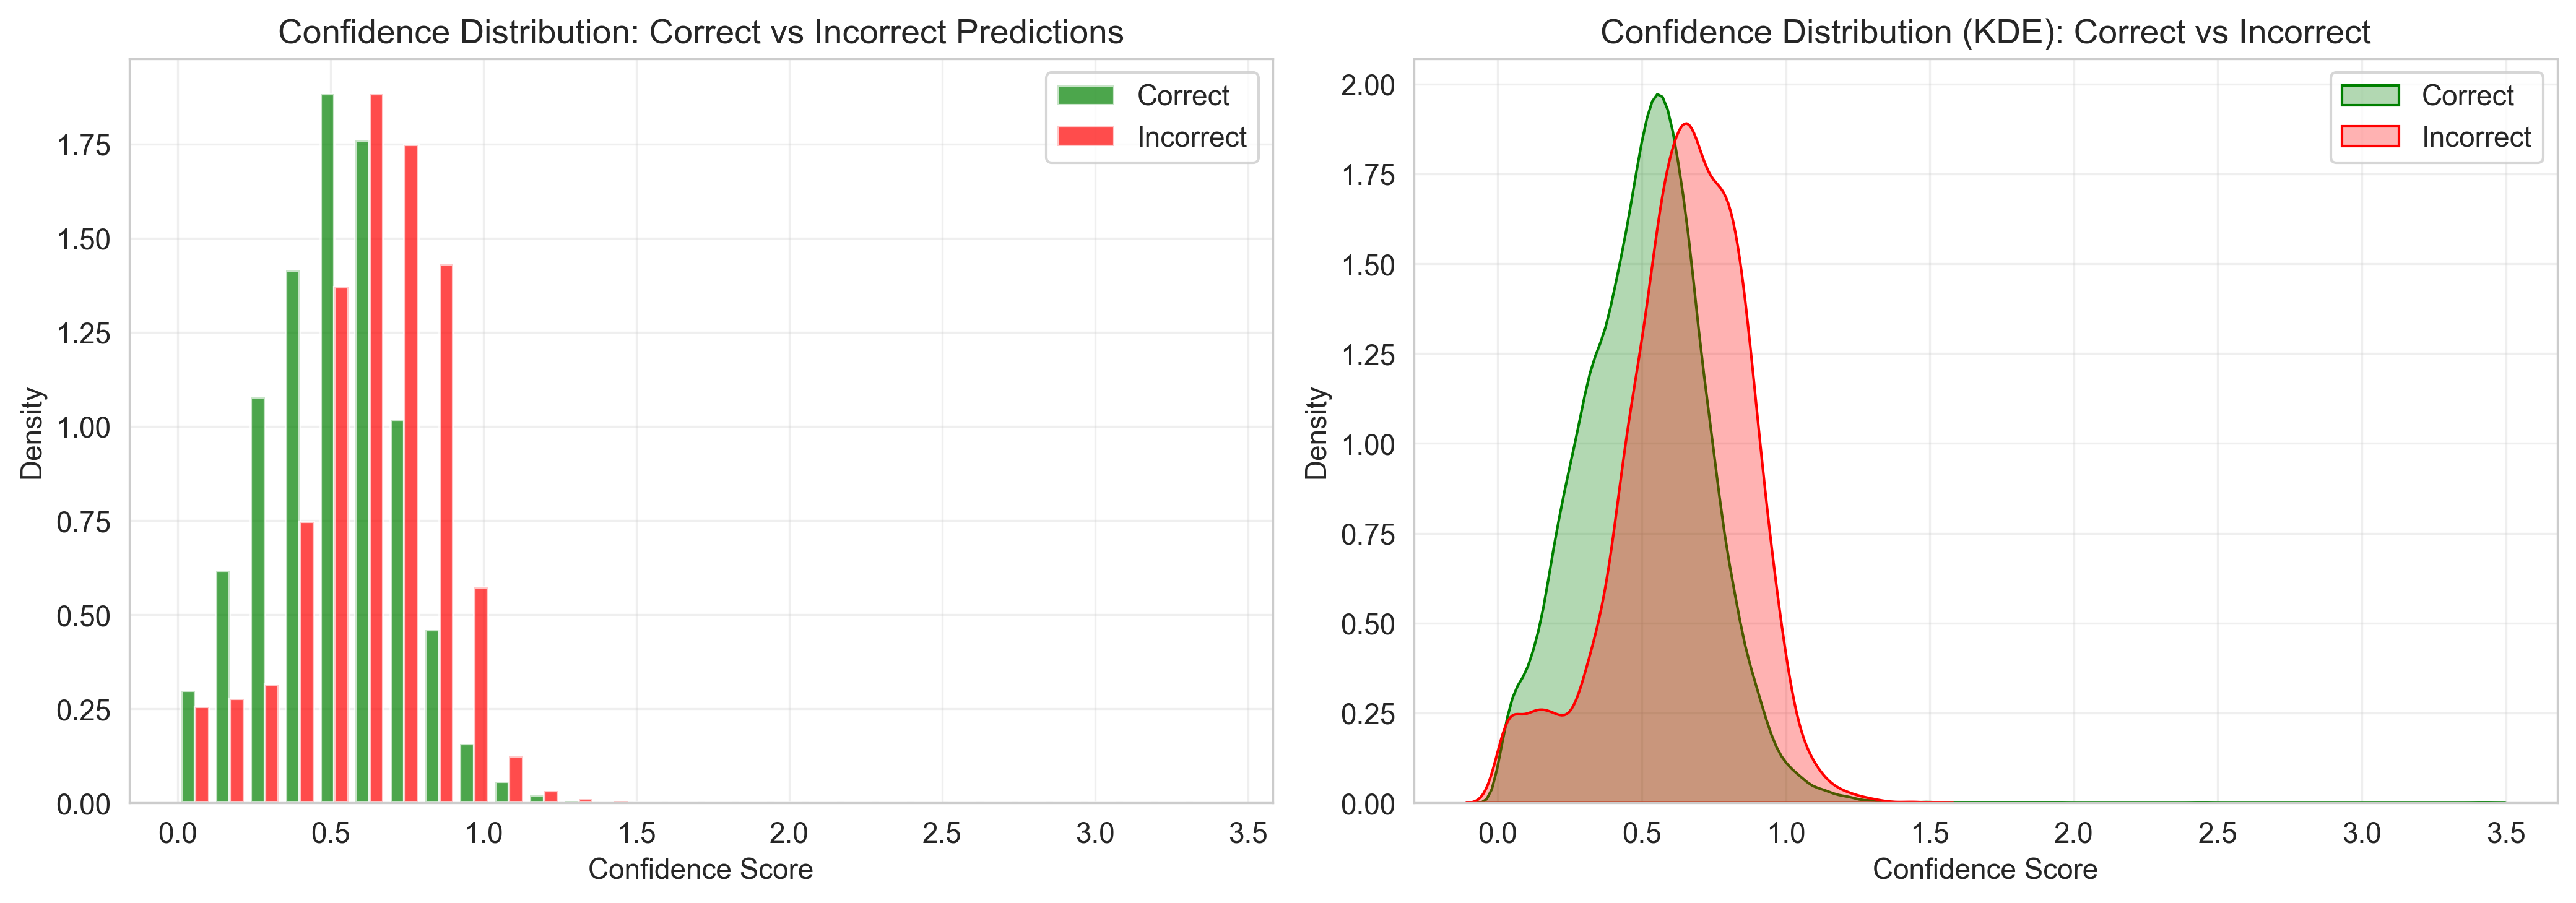

In [3]:
display(Image("plots/run1/confidence_by_correctness.png"))

## 4. Confidence by Refusal Category

**4 Categories:** confident_refusal, confident_compliance, uncertain_refusal, uncertain_compliance



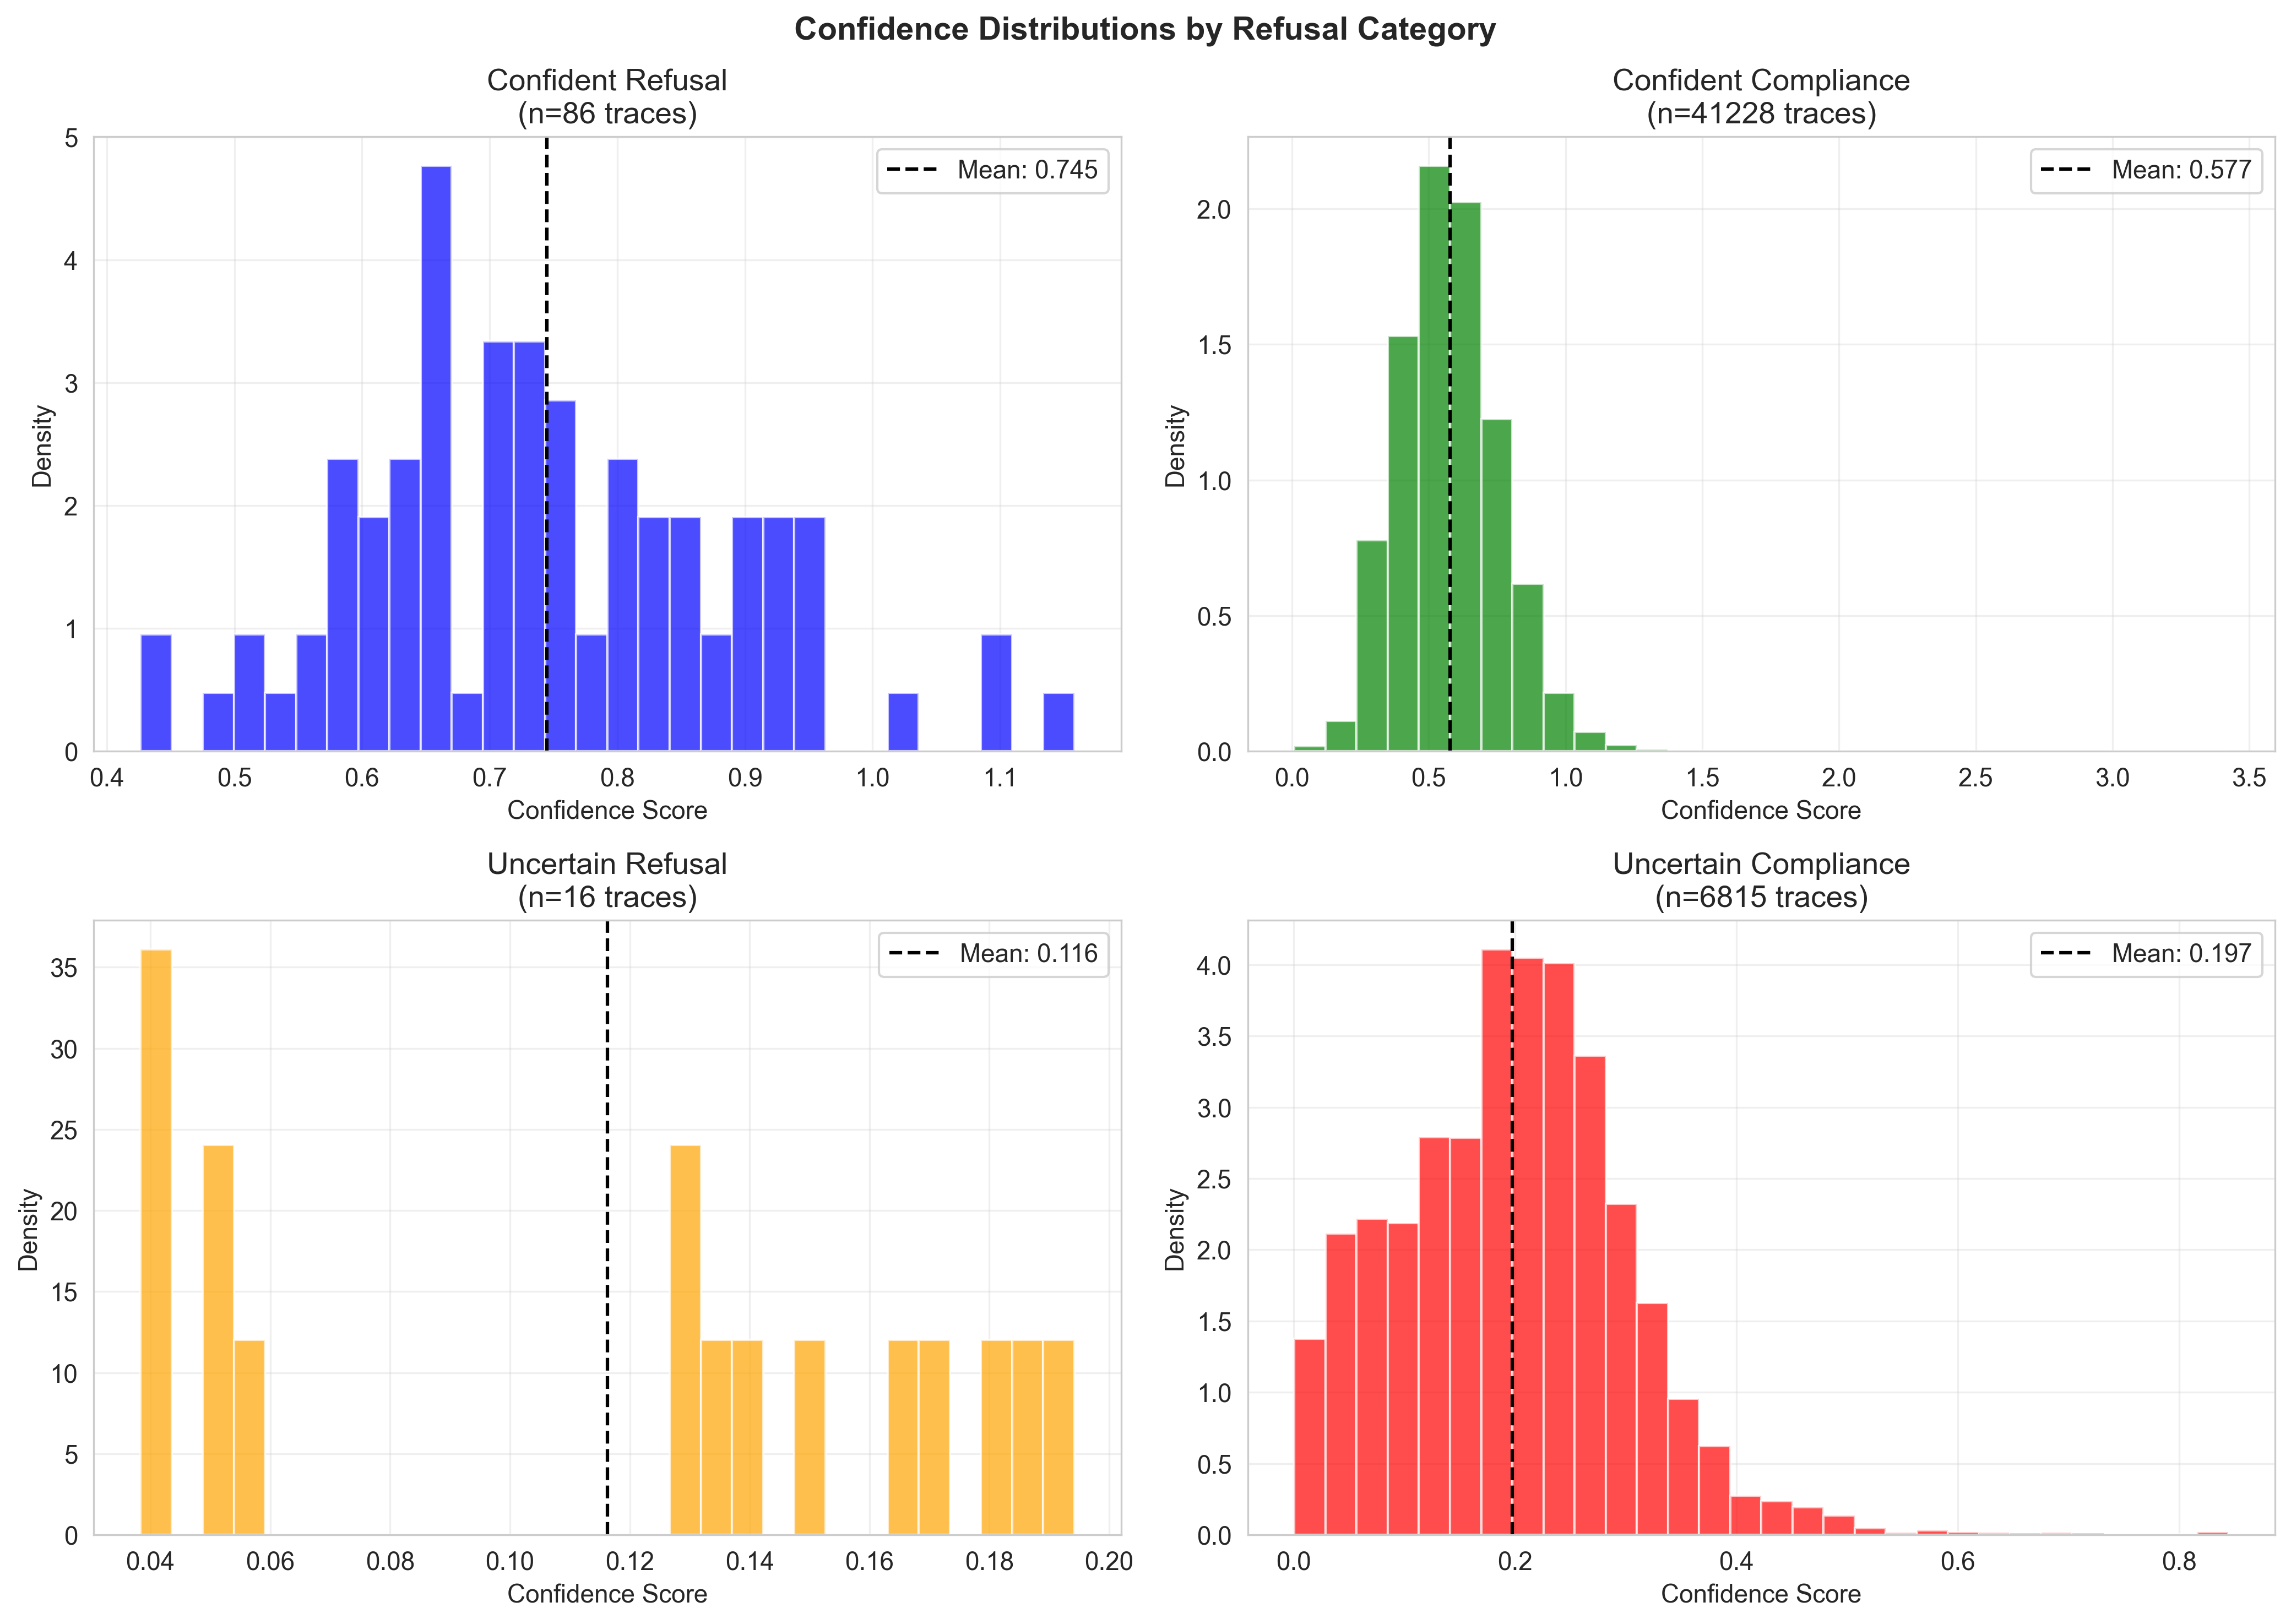

In [4]:
display(Image("plots/run1/confidence_by_category.png"))

## 5. Confidence by Ground Truth Toxicity

⚠️ **Critical Finding:** Toxic prompts get HIGHER confidence responses\!



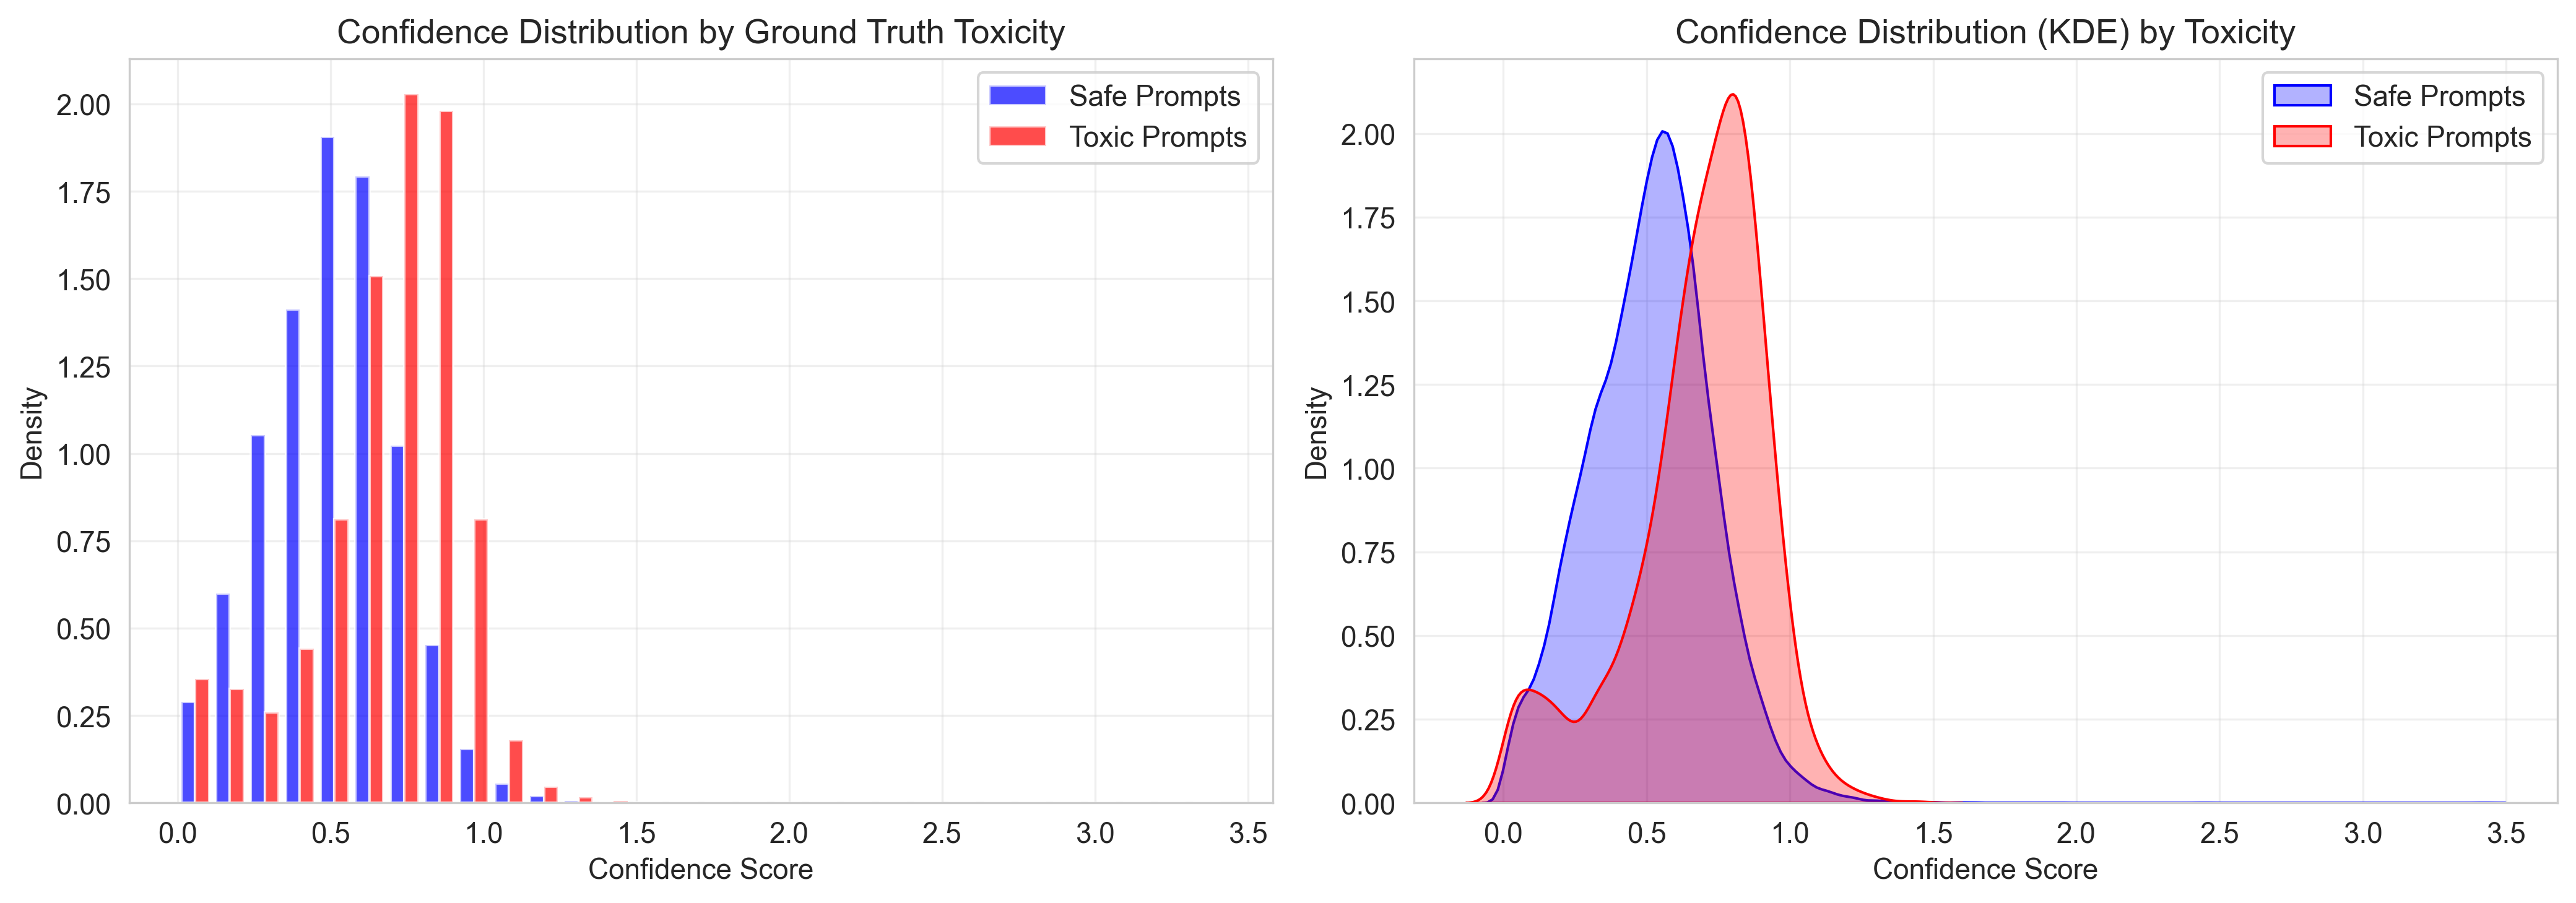

In [5]:
display(Image("plots/run1/confidence_by_toxicity.png"))

## 6. Trace Evolution

**How confidence changes across 10 traces (100 sampled instances)**



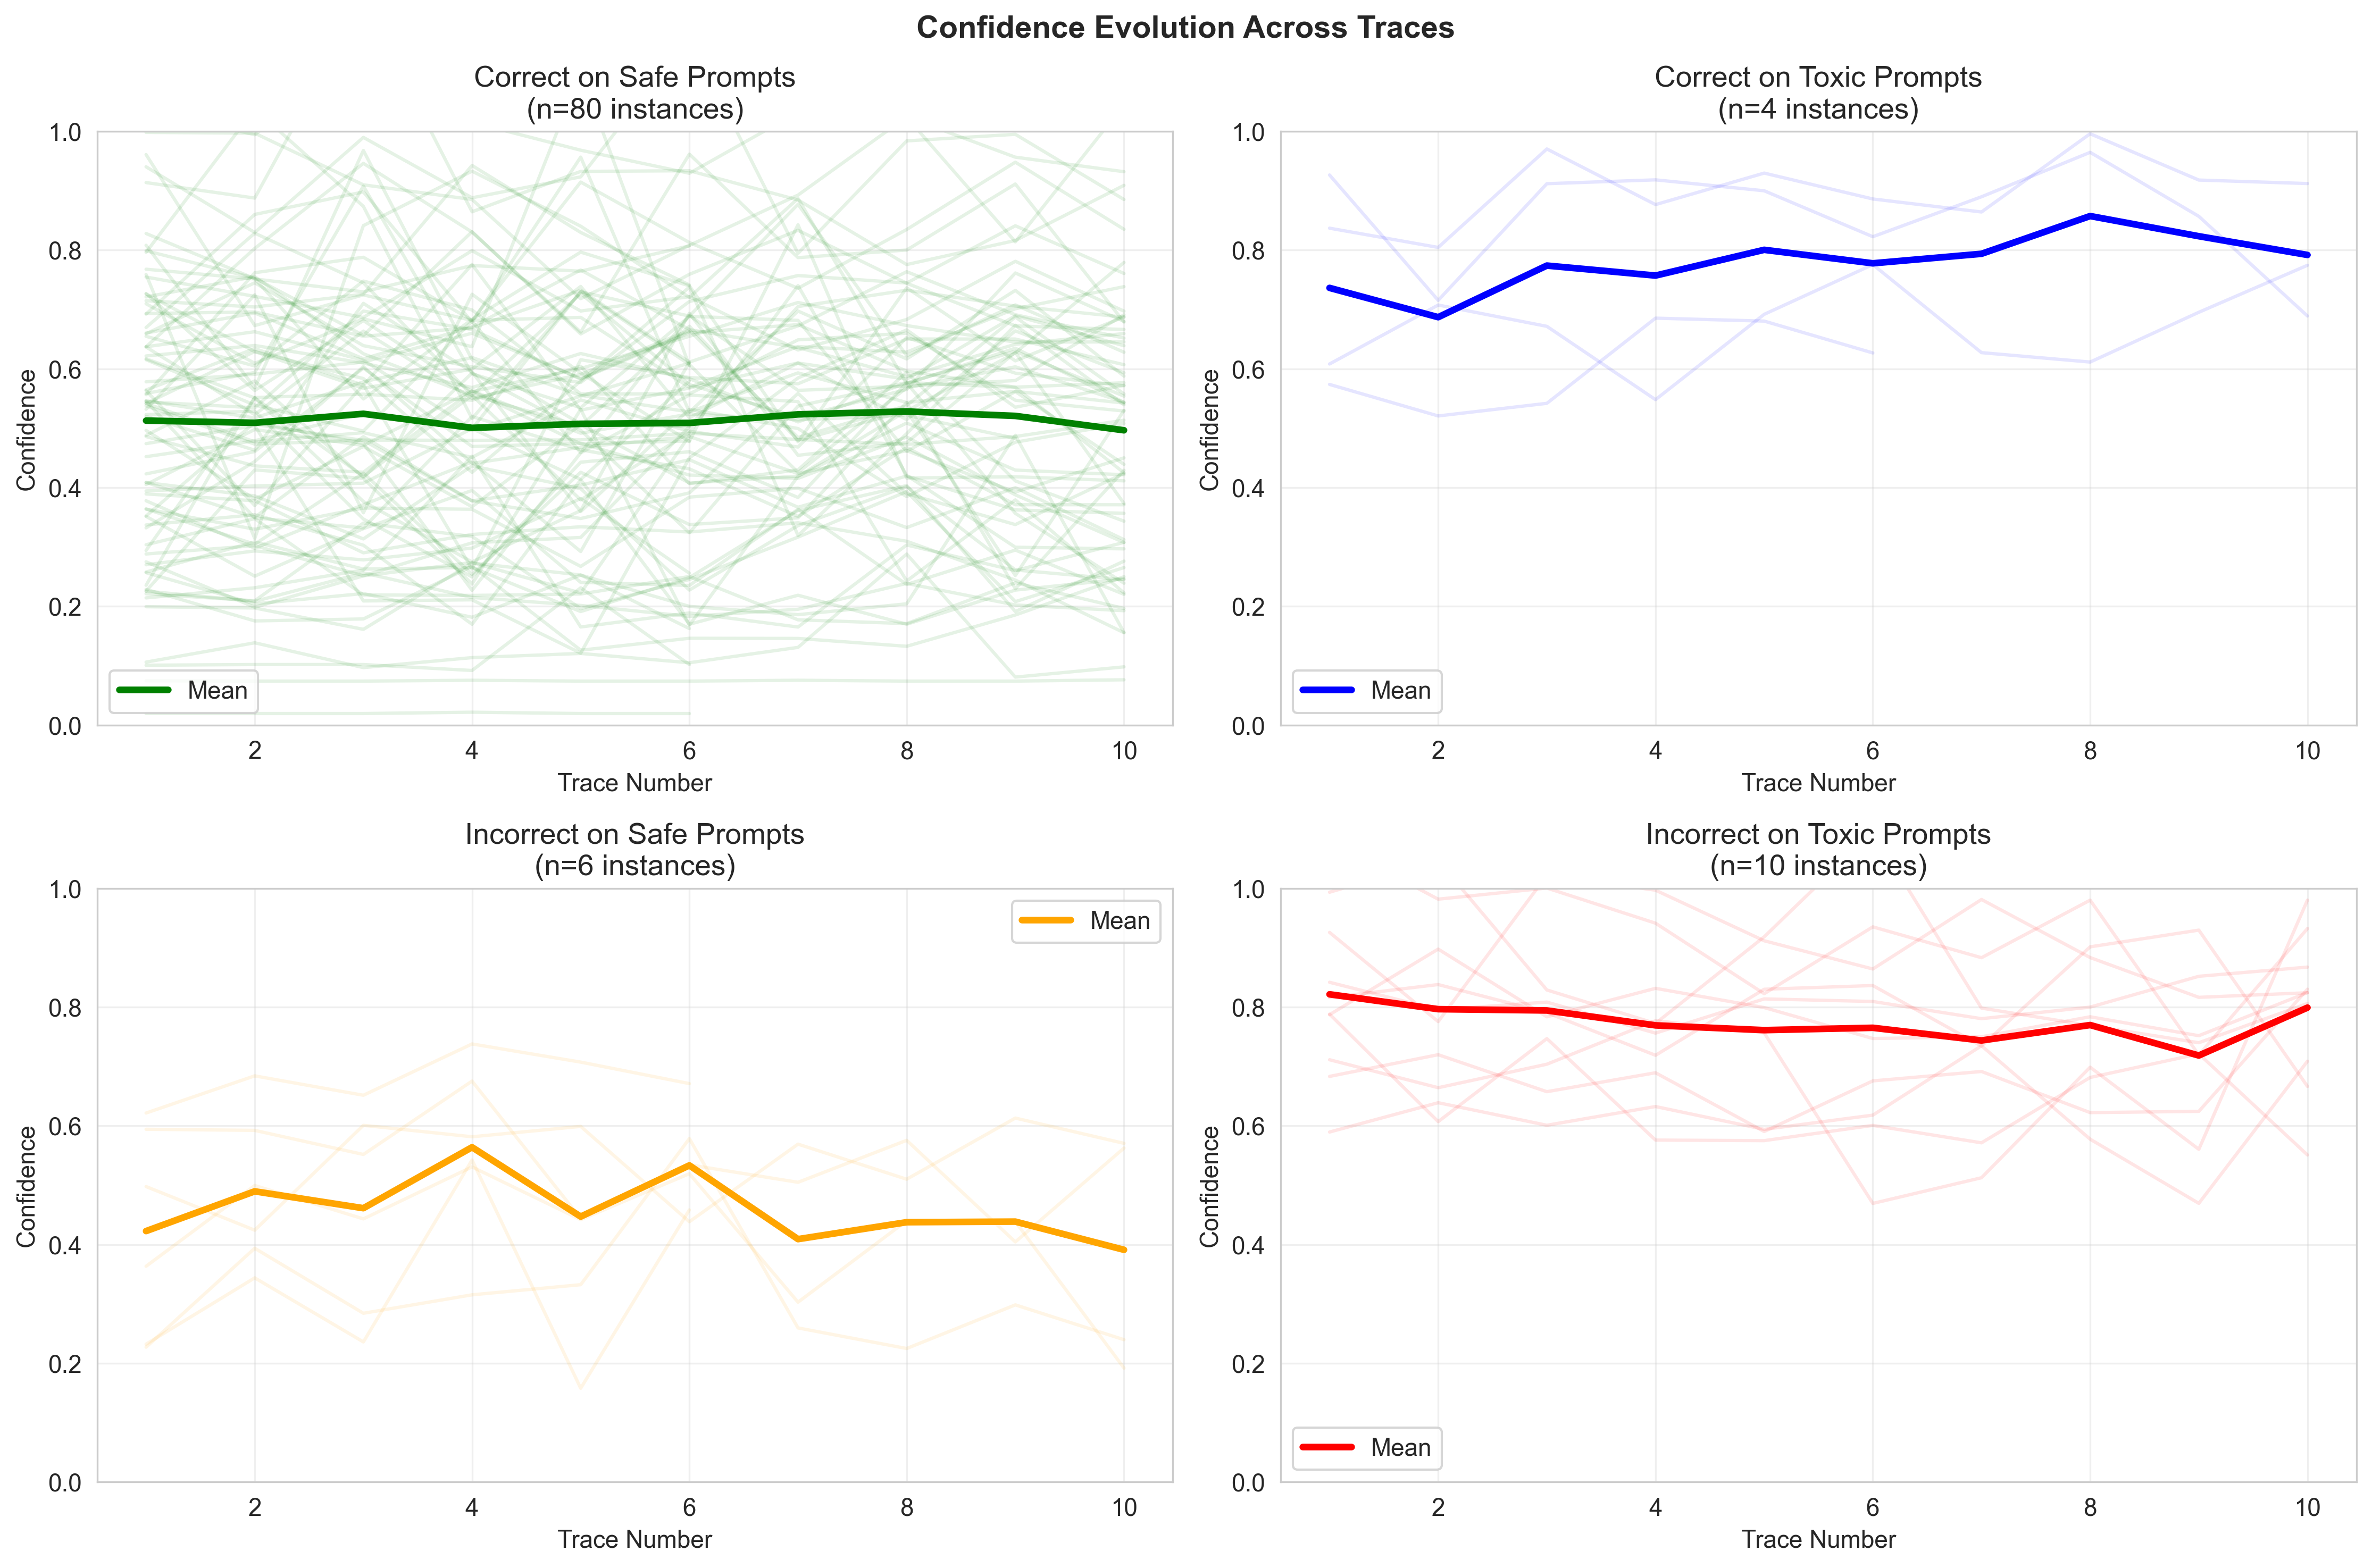

In [6]:
display(Image("plots/run1/trace_evolution.png"))